In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import pyqg

year = 24*60*60*360.
# Set up a model which will run for 20 years and start averaging after 10 years.
# There are lots of parameters that can be specified as keyword arguments
# but we are just using the defaults.
m = pyqg.QGModel(tmax=20*year, twrite=10000, tavestart=10*year)
# run it
m.run()

INFO:  Logger initialized
INFO: Step: 10000, Time: 7.20e+07, KE: 5.35e-04, CFL: 0.110
INFO: Step: 20000, Time: 1.44e+08, KE: 5.45e-04, CFL: 0.095
INFO: Step: 30000, Time: 2.16e+08, KE: 4.87e-04, CFL: 0.088
INFO: Step: 40000, Time: 2.88e+08, KE: 4.70e-04, CFL: 0.094
INFO: Step: 50000, Time: 3.60e+08, KE: 4.78e-04, CFL: 0.093
INFO: Step: 60000, Time: 4.32e+08, KE: 4.82e-04, CFL: 0.083
INFO: Step: 70000, Time: 5.04e+08, KE: 5.08e-04, CFL: 0.094
INFO: Step: 80000, Time: 5.76e+08, KE: 4.98e-04, CFL: 0.094


## Example of plots

## The QG potential vorticities in physical space

In [18]:
q1 = m.q[0] + m.Qy[0]*m.y
q2 = m.q[1] + m.Qy[1]*m.y

Text(0, 0.5, 'y [km]')

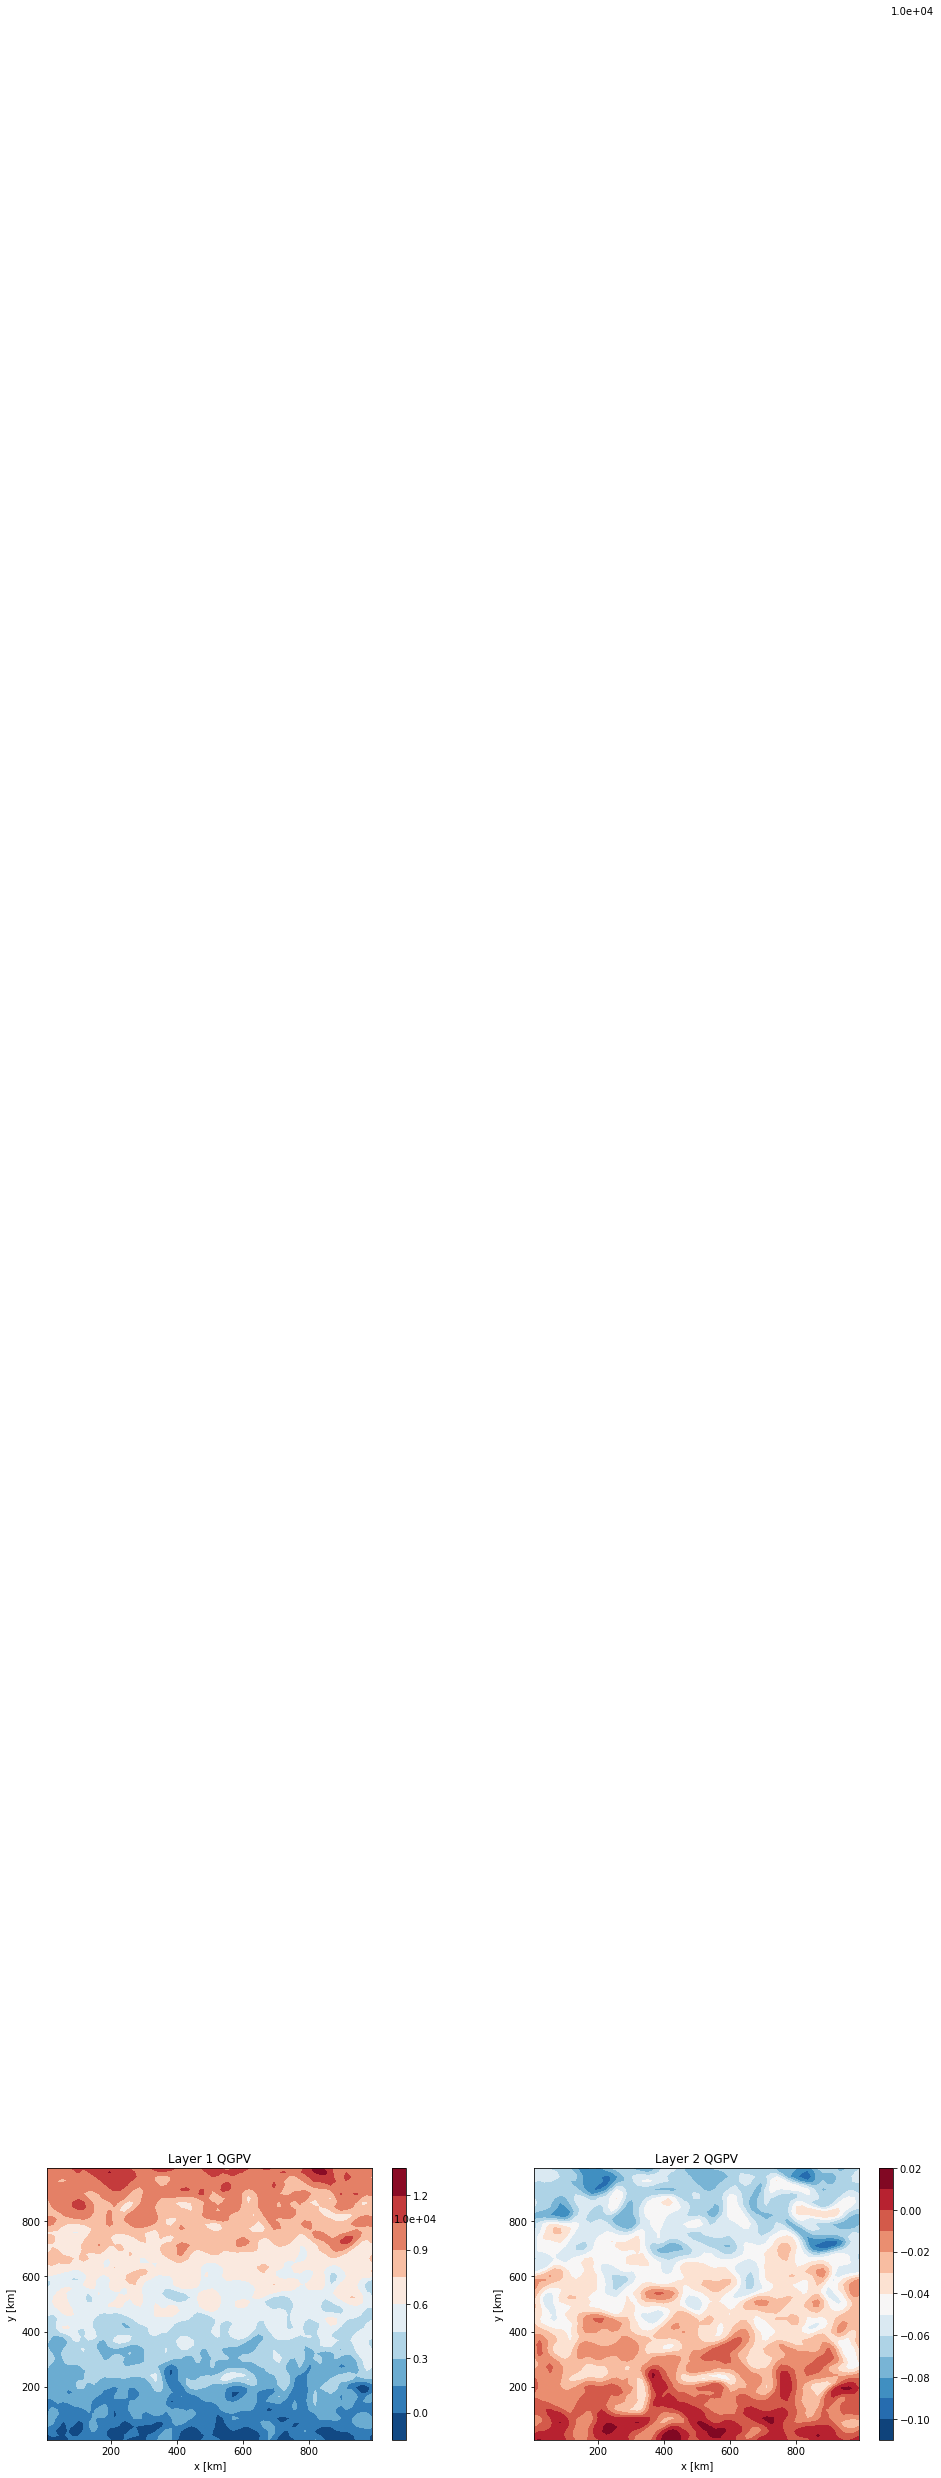

In [19]:
X, Y = m.x/1e3, m.y/1e3 # give units in km
pv_factor = 1.e4
factor_s = str('%1.1e') %pv_factor

fig = plt.figure(figsize=(16.,5.))
ax1 = fig.add_subplot(121)
cf1 = ax1.contourf(X, Y, pv_factor*q1, 12, cmap='RdBu_r')
cb1 = fig.colorbar(cf1)
cb1.ax.text(.0,1.05,factor_s,rotation=0)
ax1.set_xlabel('x [km]')
ax1.set_ylabel('y [km]')
ax1.set_title('Layer 1 QGPV')
ax2 = fig.add_subplot(122)
cf2 = ax2.contourf(X, Y, pv_factor*q2, 12, cmap='RdBu_r')
cb2 = fig.colorbar(cf2)
ax2.set_title('Layer 2 QGPV')
cb2.ax.text(.0,1.05,factor_s,rotation=0)
ax2.set_xlabel('x [km]')
ax2.set_ylabel('y [km]')

## KE spectra and Energy budget

<ipython-input-21-cb0bd5224830>:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_xlim([m.kk.min(), m.kk.max()])
<ipython-input-21-cb0bd5224830>:41: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim([m.kk.min(), m.kk.max()])


Text(0.5, 0, 'k (m$^{-1})$')

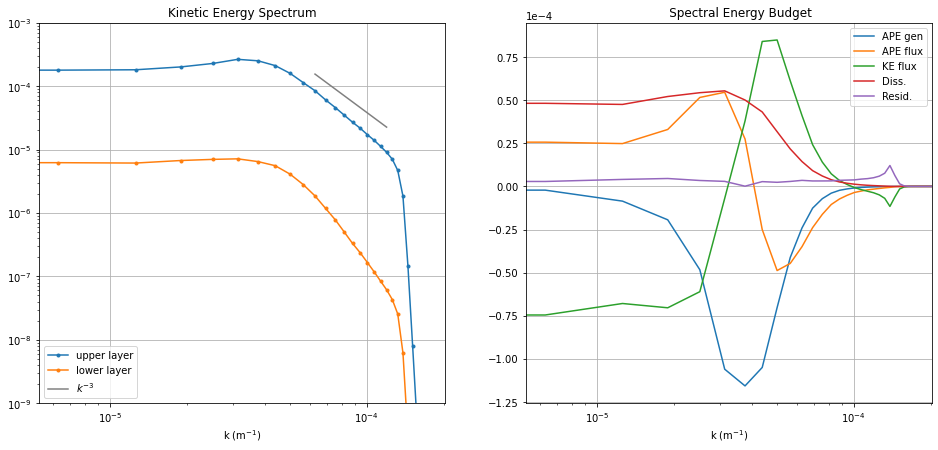

In [21]:
# some spectral plots
KE1spec = m.get_diagnostic('KEspec')[0].sum(axis=0)   # note that this is misleading for anisotrphic flows...
KE2spec = m.get_diagnostic('KEspec')[1].sum(axis=0)   #  we should sum azimuthaly, and plot as a functions of kappa 
                                                
# factor ebud
ebud_factor = 1.e4
ebud_factor_s= str('%1.1e') %ebud_factor

# inertial range
ir = np.r_[10:20]


fig = plt.figure(figsize=(16.,7.))
ax1 = fig.add_subplot(121)
ax1.loglog( m.kk, KE1spec, '.-' )
ax1.loglog( m.kk, KE2spec, '.-' )
ax1.loglog( m.kk[10:20], 2*(m.kk[ir]**-3) *
                         KE1spec[ir].mean() / (m.kk[ir]**-3).mean(),
                         '0.5')
ax1.set_ylim([1e-9,1e-3])
ax1.set_xlim([m.kk.min(), m.kk.max()])
ax1.grid()
ax1.legend(['upper layer','lower layer', r'$k^{-3}$'],
       loc='lower left')
ax1.set_xlabel(r'k (m$^{-1})$')
ax1.set_title('Kinetic Energy Spectrum')

# the spectral energy budget
ebud = [ -m.get_diagnostic('APEgenspec').sum(axis=0),
         -m.get_diagnostic('APEflux').sum(axis=0),
         -m.get_diagnostic('KEflux').sum(axis=0),
         m.rek*m.del2*m.get_diagnostic('KEspec')[1].sum(axis=0)*m.M**2 ]
ebud.append(-np.vstack(ebud).sum(axis=0))
ebud_labels = ['APE gen','APE flux','KE flux','Diss.','Resid.']

ax2 = fig.add_subplot(122)
[ax2.semilogx(m.kk, term) for term in ebud]
ax2.legend(ebud_labels, loc='upper right')

ax2.grid()
ax2.set_xlim([m.kk.min(), m.kk.max()])
ax1.set_xlabel(r'k (m$^{-1})$')
ax2.ticklabel_format(axis='y',style = 'sci', scilimits=(-2,2))
ax2.set_title(r'      Spectral Energy Budget')

ax2.set_xlabel(r'k (m$^{-1})$')